In [70]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
print(X.shape)

# output dataset            
y = np.array([[0,1,1,0]]).T

(4, 3)


In [80]:
def sigmoid(x,deriv_wrt_output=False):
    if deriv_wrt_output:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))
    
class NN:
    def __init__(self, xtrain,ytrain,hlayers):
        np.random.seed(1)
        assert(len(hlayers) >= 1)
        self.weights = []
        self.layers = []

        # First create the first weights
        self.weights.append(2 * np.random.random((xtrain.shape[-1] + 1, hlayers[0])) - 1)

        # Now create the weights that map between hidden layers
        for i, hlayer in enumerate(hlayers[:-1]):
            self.weights.append(
                2 * np.random.random((hlayer + 1, hlayers[i + 1]))
            )

        # Now create the last weights. Note we add the bias node
        self.weights.append(2 * np.random.random((hlayers[-1] + 1, ytrain.shape[-1])) - 1)
    
    def forward(self, x):
        # Add the first layer
        self.layers = [np.hstack((x, np.ones((x.shape[0],1))))]
        
        # Propagate through the network, always adding the bias layer
        for i, weight in enumerate(self.weights[:-1]):
            self.layers.append(
                np.hstack((
                    sigmoid(self.layers[i].dot(weight)),
                    np.ones((x.shape[0],1))
                ))
            )
        
        # Dont add bias on the last layer
        self.layers.append(sigmoid(self.layers[-1].dot(self.weights[-1])))
        
        # return the output layer
        return self.layers[-1]

    def backward(self, y):
        
        errors = [y - self.layers[-1]]
        deltas = []
        for i, weight in enumerate(reversed(self.weights)):
            deltas.append(errors[i] * sigmoid(self.layers[-1-i], deriv_wrt_output=True))
            
            if i > 0:
                errors.append(deltas[i][:,:-1].dot(weight.T))
            else:
                errors.append(deltas[i].dot(weight.T))
                
        # Now apply deltas
        for i, weight in enumerate(reversed(self.weights)):
            if i > 0:
                adj = self.layers[-i-2].T.dot(deltas[i][:,:-1])
            else:
                adj = self.layers[-i-2].T.dot(deltas[i])
                
            weight += adj
            

    def train(self, x, y, niter, errors=None):
        for i in range(niter):

            out = self.forward(x)
            if errors != None:
                errors.append(np.mean(np.abs(out - y)))
            self.backward(y)

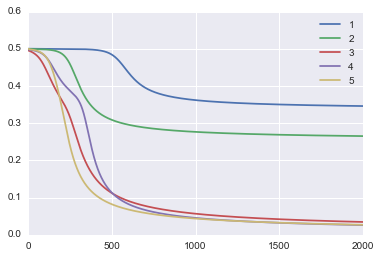

In [89]:
            
xtrain = X
ytrain = y

for i in range(1,6):
    nn = NN(xtrain, ytrain, [i])

    errs = []
    nn.train(xtrain, ytrain, 2000, errs)

    sns.plt.plot(errs, label=i)
sns.plt.legend()

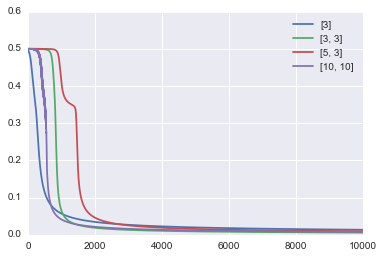

In [92]:
xtrain = X
ytrain = y

for layers in [[3], [3,3], [5,3], [10,10]]:
    nn = NN(xtrain, ytrain, layers)

    errs = []
    nn.train(xtrain, ytrain, 10000, errs)

    sns.plt.plot(errs, label=layers)
sns.plt.legend()